# **Module**: Univariate Statistical Process Monitoring
## **Lecture**: Industrial application of CUSUM control chart
### *Topic*:  CUSUM control chart-based monitoring of aeration tank

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ==================================================================================
#                        Read and explore dataset
# ==================================================================================

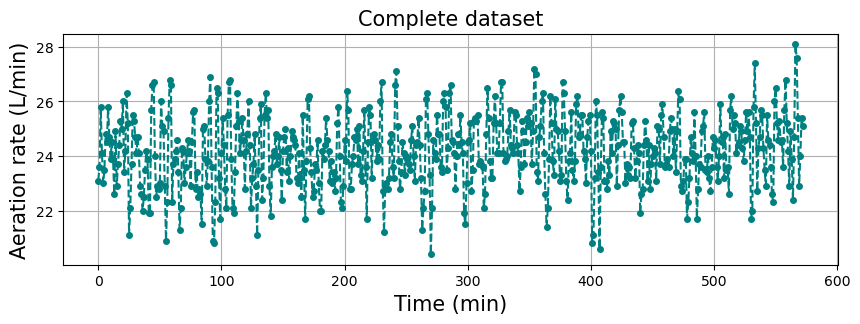

In [3]:
# read data
data = np.loadtxt('aeration-rate.csv', skiprows=1)

# plots
plt.figure(figsize=(10,3))
plt.plot(data,'--',marker='o', markersize=4, color='teal')
plt.xlabel('Time (min)', fontsize=15), plt.ylabel('Aeration rate (L/min)', fontsize=15)
plt.title('Complete dataset', fontsize=15)
plt.grid()
plt.show()

In [4]:
# ==================================================================================
#                                    Model Training
# ==================================================================================

> ##### we will use the first 200 samples as NOC data to estimate the CUSUM control chart parameters, which are the mean (mu) and standard deviation (sigma) of the signal, and the Control limit (H)

In [5]:
# fetch NOC data
N = 200
x_faultFree = data[:N]

In [6]:
# estimate CUSUM model parameters and plot control chart for NOC data
mu, sigma = np.mean(x_faultFree), np.std(x_faultFree)
k = 0.25*sigma
H = 5*sigma

print(f'CUSUM chart control limit: {H}')

CUSUM chart control limit: 6.81867839100804


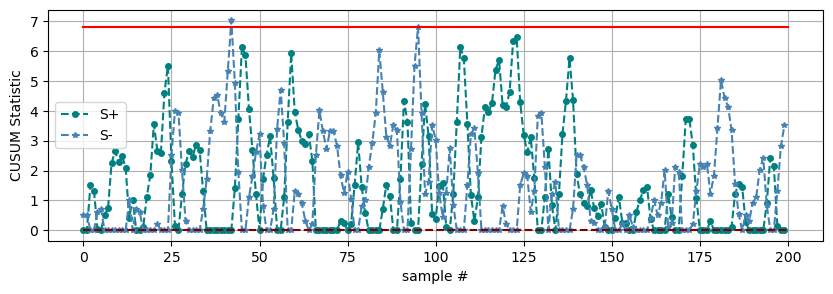

In [7]:
# compute CUSUM statistic for NOC data
S_positive = np.zeros((len(x_faultFree),))
S_negative = np.zeros((len(x_faultFree),))

for i in range(len(x_faultFree)):
    if i==0:
        S_positive[i] = np.max([0, x_faultFree[i]-(mu+k)])
        S_negative[i] = np.max([0, (mu-k)-x_faultFree[i]])
    else:
        S_positive[i] = np.max([0, x_faultFree[i]-(mu+k) + S_positive[i-1]])
        S_negative[i] = np.max([0, (mu-k)-x_faultFree[i] + S_negative[i-1]])

# plot control chart for NOC data
plt.figure(figsize=(10,3))
plt.plot(S_positive,'--',marker='o', markersize=4, color='teal', label='S+')
plt.plot(S_negative,'--',marker='*', markersize=4, color='steelblue', label='S-')
plt.plot([0,N],[H,H], color='red')
plt.plot([0,N],[0,0], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('CUSUM Statistic')
plt.grid(), plt.legend()
plt.show()

In [8]:
# ==================================================================================
#               Fetch test samples and plot on control chart
# ==================================================================================

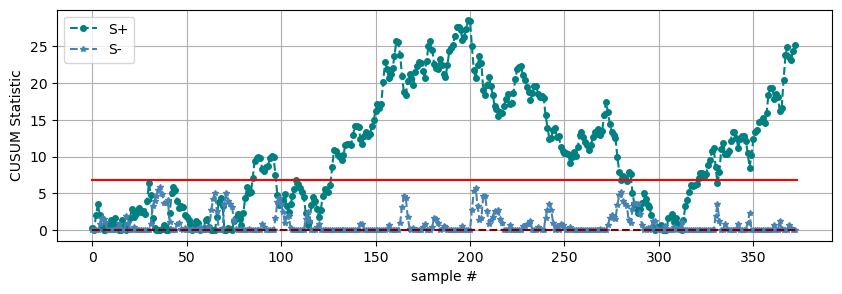

In [9]:
# test data
x_test = data[200:]
N_test = len(x_test)

# CUSUM statistic for faulty data
S_positive_test = np.zeros((len(x_test),))
S_negative_test = np.zeros((len(x_test),))

for i in range(len(x_test)):
    if i==0:
        S_positive_test[i] = np.max([0, x_test[i]-(mu+k)])
        S_negative_test[i] = np.max([0, (mu-k)-x_test[i]]) 
    else:
        S_positive_test[i] = np.max([0, x_test[i]-(mu+k) + S_positive_test[i-1]])
        S_negative_test[i] = np.max([0, (mu-k)-x_test[i] + S_negative_test[i-1]])

# plot control chart for test data
plt.figure(figsize=(10,3))
plt.plot(S_positive_test,'--',marker='o', markersize=4, color='teal', label='S+')
plt.plot(S_negative_test,'--',marker='*', markersize=4, color='steelblue', label='S-')
plt.plot([0,N_test],[H,H], color='red')
plt.plot([0,N_test],[0,0], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('CUSUM Statistic')
plt.grid(), plt.legend()
plt.show()

In [10]:
# ==================================================================================
#                   control chart for all samples combined
# ==================================================================================

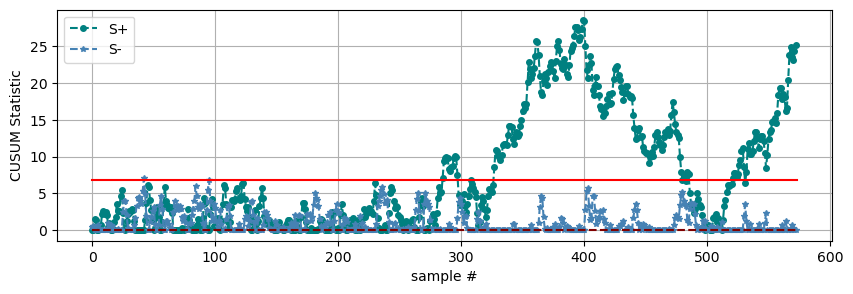

In [11]:
# CUSUM statistics and control chart for combined data
x_combined = data

S_positive = np.zeros((len(x_combined),))
S_negative = np.zeros((len(x_combined),))

for i in range(len(x_combined)):
    if i==0:
        S_positive[i] = np.max([0, x_combined[i]-(mu+k)])
        S_negative[i] = np.max([0, (mu-k)-x_combined[i]]) 
    else:
        S_positive[i] = np.max([0, x_combined[i]-(mu+k) + S_positive[i-1]])
        S_negative[i] = np.max([0, (mu-k)-x_combined[i] + S_negative[i-1]])

plt.figure(figsize=(10,3))
plt.plot(S_positive,'--',marker='o', markersize=4, color='teal', label='S+')
plt.plot(S_negative,'--',marker='*', markersize=4, color='steelblue', label='S-')
plt.plot([0,len(x_combined)],[H,H], color='red')
plt.plot([0,len(x_combined)],[0,0], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('CUSUM Statistic')
plt.grid()
plt.legend()
plt.show()